In [1]:
##In this module, we are going to interpret the model for the better understanding

In [2]:
##Loading all the necessary modules

In [3]:
%load_ext autoreload
%autoreload 2

In [4]:
%matplotlib inline

In [5]:
##Loading fastai library

In [6]:
from fastai.imports import *  
from fastai.structured import *

In [7]:
##Importing other important libraries

In [8]:
from pandas_summary import DataFrameSummary  ##for dataframe handling
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier, RandomTreesEmbedding  ##for implementing the 
##random forest model. For this we can use anything like classifier or may be regressor. This entirely depends on the problem 
##which are going to solve

In [9]:
from IPython.display import display  ##importing IPython module
from sklearn import metrics  ##sklearn again for matrix operations

In [10]:
set_plot_sizes(12,14,16)

In [11]:
##Now we are going to use pandas to load the data using the dataframes

In [12]:
data = pd.read_csv('data/bulldozer/Train.csv', low_memory = False, parse_dates=["saledate"])

In [13]:
data.head().transpose()

,0,1,2,3,4
SalesID,1139246,1139248,1139249,1139251,1139253
SalePrice,66000,57000,10000,38500,11000
MachineID,999089,117657,434808,1026470,1057373
ModelID,3157,77,7009,332,17311
datasource,121,121,121,121,121
auctioneerID,3,3,3,3,3
YearMade,2004,1996,2001,2001,2007
MachineHoursCurrentMeter,68,4640,2838,3486,722
UsageBand,Low,Low,High,High,Medium
saledate,2006-11-16 00:00:00,2004-03-26 00:00:00,2004-02-26 00:00:00,2011-05-19 00:00:00,2009-07-23 00:00:00


In [14]:
##Since this project going to be evaluated using the root mean square log error. 
##so it necessary to convert the output data into log

In [15]:
data.SalePrice = np.log(data.SalePrice)

In [16]:
data.SalePrice

0         11.097410
1         10.950807
2          9.210340
3         10.558414
4          9.305651
5         10.184900
6          9.952278
7         10.203592
8          9.975808
9         11.082143
10        10.085809
11        10.021271
12        10.491274
13        10.325482
14        10.239960
15         9.852194
16         9.510445
17         9.159047
18         9.433484
19         9.350102
20        10.621327
21        10.448715
22        10.165852
23        11.198215
24        10.404263
25         9.433484
26         9.648595
27        10.878047
28        10.736397
29        11.396392
            ...    
401095     9.259131
401096     9.210340
401097     9.047821
401098     9.259131
401099     9.305651
401100     9.259131
401101     9.210340
401102     9.259131
401103     9.433484
401104     9.259131
401105     9.210340
401106     9.259131
401107     9.433484
401108     9.259131
401109     9.259131
401110     9.259131
401111     9.210340
401112     9.259131
401113     9.259131


In [17]:
data.columns

Index(['SalesID', 'SalePrice', 'MachineID', 'ModelID', 'datasource',
       'auctioneerID', 'YearMade', 'MachineHoursCurrentMeter', 'UsageBand',
       'saledate', 'fiModelDesc', 'fiBaseModel', 'fiSecondaryDesc',
       'fiModelSeries', 'fiModelDescriptor', 'ProductSize',
       'fiProductClassDesc', 'state', 'ProductGroup', 'ProductGroupDesc',
       'Drive_System', 'Enclosure', 'Forks', 'Pad_Type', 'Ride_Control',
       'Stick', 'Transmission', 'Turbocharged', 'Blade_Extension',
       'Blade_Width', 'Enclosure_Type', 'Engine_Horsepower', 'Hydraulics',
       'Pushblock', 'Ripper', 'Scarifier', 'Tip_Control', 'Tire_Size',
       'Coupler', 'Coupler_System', 'Grouser_Tracks', 'Hydraulics_Flow',
       'Track_Type', 'Undercarriage_Pad_Width', 'Stick_Length', 'Thumb',
       'Pattern_Changer', 'Grouser_Type', 'Backhoe_Mounting', 'Blade_Type',
       'Travel_Controls', 'Differential_Type', 'Steering_Controls'],
      dtype='object')

In [18]:
##before using add_datepart function and get insight into the source code use ??add_datepart

In [19]:
add_datepart(data,'saledate')

In [20]:
data.columns

Index(['SalesID', 'SalePrice', 'MachineID', 'ModelID', 'datasource',
       'auctioneerID', 'YearMade', 'MachineHoursCurrentMeter', 'UsageBand',
       'fiModelDesc', 'fiBaseModel', 'fiSecondaryDesc', 'fiModelSeries',
       'fiModelDescriptor', 'ProductSize', 'fiProductClassDesc', 'state',
       'ProductGroup', 'ProductGroupDesc', 'Drive_System', 'Enclosure',
       'Forks', 'Pad_Type', 'Ride_Control', 'Stick', 'Transmission',
       'Turbocharged', 'Blade_Extension', 'Blade_Width', 'Enclosure_Type',
       'Engine_Horsepower', 'Hydraulics', 'Pushblock', 'Ripper', 'Scarifier',
       'Tip_Control', 'Tire_Size', 'Coupler', 'Coupler_System',
       'Grouser_Tracks', 'Hydraulics_Flow', 'Track_Type',
       'Undercarriage_Pad_Width', 'Stick_Length', 'Thumb', 'Pattern_Changer',
       'Grouser_Type', 'Backhoe_Mounting', 'Blade_Type', 'Travel_Controls',
       'Differential_Type', 'Steering_Controls', 'saleYear', 'saleMonth',
       'saleWeek', 'saleDay', 'saleDayofweek', 'saleDayofyear',


In [21]:
##Now still we haven't converted all the categorical values to the continous values.
##Till now, we are only done with the saledate column only. So we are going to make the use train_cats() function in order to 
##convert strings to pandas categories.
##This is fastai library function. Make the ??train_cats in order to see the source code. 
##train_cats() is apply different for test set, validation set and for training set which can be a huge problem.
##So make the use of apply_cats function by fastai library so that the mapping done in training set will be the same for the 
##test and validation sets. And make the use ??apply_cats for the source code.
##train_cats doesn't make changes visible but in the backend it does the proper work. 
##For example lets see the state columns 

In [22]:
train_cats(data)

In [23]:
data.head().transpose()

,0,1,2,3,4
SalesID,1139246,1139248,1139249,1139251,1139253
SalePrice,11.0974,10.9508,9.21034,10.5584,9.30565
MachineID,999089,117657,434808,1026470,1057373
ModelID,3157,77,7009,332,17311
datasource,121,121,121,121,121
auctioneerID,3,3,3,3,3
YearMade,2004,1996,2001,2001,2007
MachineHoursCurrentMeter,68,4640,2838,3486,722
UsageBand,Low,Low,High,High,Medium
fiModelDesc,521D,950FII,226,PC120-6E,S175


In [24]:
data.UsageBand.cat.set_categories(['Low','Medium','High'], ordered=True, inplace=True)

In [25]:
def display_all(df):
    with pd.option_context("display.max_rows", 100):
        with pd.option_context("display.max_columns", 100):
            display(df)

In [26]:
display_all(data.isnull().sum().sort_index()/len(data))

Backhoe_Mounting            0.803872
Blade_Extension             0.937129
Blade_Type                  0.800977
Blade_Width                 0.937129
Coupler                     0.466620
Coupler_System              0.891660
Differential_Type           0.826959
Drive_System                0.739829
Enclosure                   0.000810
Enclosure_Type              0.937129
Engine_Horsepower           0.937129
Forks                       0.521154
Grouser_Tracks              0.891899
Grouser_Type                0.752813
Hydraulics                  0.200823
Hydraulics_Flow             0.891899
MachineHoursCurrentMeter    0.644089
MachineID                   0.000000
ModelID                     0.000000
Pad_Type                    0.802720
Pattern_Changer             0.752651
ProductGroup                0.000000
ProductGroupDesc            0.000000
ProductSize                 0.525460
Pushblock                   0.937129
Ride_Control                0.629527
Ripper                      0.740388
S

In [27]:
##proc_df function
##It first drop the dependent variable from the dataframe
##Then fix the missing values. For numeric column it first check the for the missing value then it create new columns with same 
##column name + '_na'. then it put 1 if the value is missing and 0 if not. Then in original columns it replace the missing 
##values with median. For the non-numeric column, pandas do it with -1 and then numericalize function of this proc_df will 
##increase the value of all the number in the column by 1. So the missing will become 0.

In [28]:
df_trn, y_trn, nas = proc_df(data, 'SalePrice')

In [29]:
##data without the dependent value

In [30]:
df_trn

,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,fiBaseModel,...,saleDayofyear,saleIs_month_end,saleIs_month_start,saleIs_quarter_end,saleIs_quarter_start,saleIs_year_end,saleIs_year_start,saleElapsed,auctioneerID_na,MachineHoursCurrentMeter_na
0,1139246,999089,3157,121,3.0,2004,68.0,1,950,296,...,320,False,False,False,False,False,False,1163635200,False,False
1,1139248,117657,77,121,3.0,1996,4640.0,1,1725,527,...,86,False,False,False,False,False,False,1080259200,False,False
2,1139249,434808,7009,121,3.0,2001,2838.0,3,331,110,...,57,False,False,False,False,False,False,1077753600,False,False
3,1139251,1026470,332,121,3.0,2001,3486.0,3,3674,1375,...,139,False,False,False,False,False,False,1305763200,False,False
4,1139253,1057373,17311,121,3.0,2007,722.0,2,4208,1529,...,204,False,False,False,False,False,False,1248307200,False,False
5,1139255,1001274,4605,121,3.0,2004,508.0,1,493,175,...,353,False,False,False,False,False,False,1229558400,False,False
6,1139256,772701,1937,121,3.0,1993,11540.0,3,1453,419,...,239,False,False,False,False,False,False,1093478400,False,False
7,1139261,902002,3539,121,3.0,2001,4883.0,3,740,243,...,321,False,False,False,False,False,False,1132185600,False,False
8,1139272,1036251,36003,121,3.0,2008,302.0,1,779,250,...,239,False,False,False,False,False,False,1251331200,False,False
9,1139275,1016474,3883,121,3.0,1000,20700.0,2,1771,540,...,221,False,False,False,False,False,False,1186617600,False,False


In [31]:
##dependent value

In [32]:
y_trn.shape

(401125,)

In [33]:
##Splitting the data

In [34]:
def split_vals(a,n): return a[:n].copy(), a[n:].copy()

In [35]:
##Splitting the complete data

In [36]:
n_valid = 12000  # same as Kaggle's test set size
n_trn = len(df_trn)-n_valid
raw_train, raw_valid = split_vals(data, n_trn)

In [37]:
##Splitting the data from divided data

In [38]:
X_train, X_valid = split_vals(df_trn, n_trn)
y_train, y_valid = split_vals(y_trn, n_trn)

X_train.shape, y_train.shape, X_valid.shape 

((389125, 66), (389125,), (12000, 66))

In [39]:
cod_xtrain = X_train
cod_xvalid = X_valid
cod_ytrain = y_train
cod_yvalid = y_valid
cod_xtrain.shape, cod_xvalid.shape, cod_ytrain.shape, cod_yvalid.shape

((389125, 66), (12000, 66), (389125,), (12000,))

In [40]:
##Now below, we have created a rmse function which will calculate the error rate and print score for score printing

In [41]:
def rmse(x,y): return math.sqrt(((x-y)**2).mean())

def print_score(m):
    res = [rmse(m.predict(X_train), y_train), rmse(m.predict(X_valid), y_valid),
                m.score(X_train, y_train), m.score(X_valid, y_valid)]
    if hasattr(m, 'oob_score_'): res.append(m.oob_score_)
    print(res)

In [42]:
data

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,...,saleDay,saleDayofweek,saleDayofyear,saleIs_month_end,saleIs_month_start,saleIs_quarter_end,saleIs_quarter_start,saleIs_year_end,saleIs_year_start,saleElapsed
0,1139246,11.097410,999089,3157,121,3.0,2004,68.0,Low,521D,...,16,3,320,False,False,False,False,False,False,1163635200
1,1139248,10.950807,117657,77,121,3.0,1996,4640.0,Low,950FII,...,26,4,86,False,False,False,False,False,False,1080259200
2,1139249,9.210340,434808,7009,121,3.0,2001,2838.0,High,226,...,26,3,57,False,False,False,False,False,False,1077753600
3,1139251,10.558414,1026470,332,121,3.0,2001,3486.0,High,PC120-6E,...,19,3,139,False,False,False,False,False,False,1305763200
4,1139253,9.305651,1057373,17311,121,3.0,2007,722.0,Medium,S175,...,23,3,204,False,False,False,False,False,False,1248307200
5,1139255,10.184900,1001274,4605,121,3.0,2004,508.0,Low,310G,...,18,3,353,False,False,False,False,False,False,1229558400
6,1139256,9.952278,772701,1937,121,3.0,1993,11540.0,High,790ELC,...,26,3,239,False,False,False,False,False,False,1093478400
7,1139261,10.203592,902002,3539,121,3.0,2001,4883.0,High,416D,...,17,3,321,False,False,False,False,False,False,1132185600
8,1139272,9.975808,1036251,36003,121,3.0,2008,302.0,Low,430HAG,...,27,3,239,False,False,False,False,False,False,1251331200
9,1139275,11.082143,1016474,3883,121,3.0,1000,20700.0,Medium,988B,...,9,3,221,False,False,False,False,False,False,1186617600


# Confidence Calculation

In [43]:
##Sampling the data for the further processing

In [44]:
set_rf_samples(50000)

In [45]:
%time m = RandomForestRegressor(n_estimators=40, n_jobs=-1, max_features=0.5, min_samples_leaf=3, oob_score=True)
m.fit(X_train, y_train)
print_score(m)

Wall time: 0 ns
[0.20614928610343067, 0.24793289457137468, 0.9111825098619598, 0.8902217570380705, 0.8941125223020113]


In [46]:
##Prediction from each tree

In [47]:
%time preds = np.stack([t.predict(X_valid) for t in m.estimators_])
preds.shape

Wall time: 2.23 s


(40, 12000)

In [48]:
preds

array([[9.35405, 9.39281, 9.17439, ..., 9.47728, 9.44141, 9.44141],
       [9.15791, 9.07553, 9.12677, ..., 9.57026, 9.16927, 9.16927],
       [8.97139, 9.50976, 9.39878, ..., 9.34583, 9.72659, 9.72659],
       ...,
       [9.31258, 9.31915, 9.35736, ..., 9.33276, 9.0716 , 9.0716 ],
       [9.19489, 9.56015, 9.02378, ..., 9.07437, 8.96824, 8.96824],
       [9.20699, 9.20699, 9.17614, ..., 9.98329, 9.56202, 9.56202]])

In [49]:
##Taking the mean of first value predicted value from each tree.

In [50]:
preds[0], np.mean(preds[:,0]), y_valid[0]

(array([9.35405, 9.39281, 9.17439, ..., 9.47728, 9.44141, 9.44141]),
 9.225686533344232,
 9.104979856318357)

In [51]:
##Calculating the standard deviation

In [52]:
np.std(preds[:,0])

0.2930855579820023

In [53]:
##Since the prediction from each tree can be parallelized using the following command

In [54]:
def get_preds(t):
    return t.predict(X_valid)

In [55]:
parallel_trees

<function fastai.structured.parallel_trees(m, fn, n_jobs=8)>

In [56]:
#This will call the same function in all the at the same time

In [57]:
%time preds = np.stack(parallel_trees(m, get_preds))

BrokenProcessPool: A process in the process pool was terminated abruptly while the future was running or pending.

In [58]:
np.mean(preds[:,0]), np.std(preds[:,0])

(9.225686533344232, 0.2930855579820023)

In [59]:
##Creating the copy of the validation data and adding mean and standard deviation column in the dataframe

In [60]:
x = raw_valid.copy()
x

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,...,saleDay,saleDayofweek,saleDayofyear,saleIs_month_end,saleIs_month_start,saleIs_quarter_end,saleIs_quarter_start,saleIs_year_end,saleIs_year_start,saleElapsed
389125,4364751,9.104980,2300944,665,172,1.0,1999,3726.0,Low,KX1212,...,16,3,259,False,False,False,False,False,False,1284595200
389126,4364757,9.047821,1265434,12042,172,1.0,1996,5809.0,Low,KX151,...,9,3,343,False,False,False,False,False,False,1291852800
389127,4364774,9.104980,2005935,9218,172,1.0,1993,0.0,NaN,KX41,...,6,4,218,False,False,False,False,False,False,1281052800
389128,4364807,9.259131,2296707,668,172,1.0,2000,1789.0,Low,KX612,...,15,2,349,False,False,False,False,False,False,1292371200
389129,4364811,9.104980,1403366,9219,172,1.0,1999,0.0,NaN,KX61,...,10,2,161,False,False,False,False,False,False,1244592000
389130,4364833,9.104980,2269421,671,172,1.0,1999,0.0,NaN,KX912,...,23,2,266,False,False,False,False,False,False,1253664000
389131,4364957,9.615805,1488675,12040,172,1.0,2003,1255.0,Low,KX1213,...,22,2,265,False,False,False,False,False,False,1285113600
389132,4364977,9.433484,2312234,667,172,1.0,2003,1469.0,Low,KX412,...,10,3,344,False,False,False,False,False,False,1260403200
389133,4364983,9.903488,1126848,12040,172,1.0,2004,2413.0,Low,KX1213,...,23,3,266,False,False,False,False,False,False,1285200000
389134,4364984,9.581904,1215388,12040,172,1.0,2004,6089.0,Medium,KX1213,...,28,1,271,False,False,False,False,False,False,1285632000


In [61]:
x['pred_std'] = np.std(preds, axis=0)
x['pred'] = np.mean(preds, axis=0)

In [62]:
x.transpose()

,389125,389126,389127,389128,389129,389130,389131,389132,389133,389134,...,401115,401116,401117,401118,401119,401120,401121,401122,401123,401124
SalesID,4364751,4364757,4364774,4364807,4364811,4364833,4364957,4364977,4364983,4364984,...,6333290,6333302,6333307,6333311,6333335,6333336,6333337,6333338,6333341,6333342
SalePrice,9.10498,9.04782,9.10498,9.25913,9.10498,9.10498,9.61581,9.43348,9.90349,9.5819,...,9.21034,9.04782,9.21034,9.15905,9.04782,9.25913,9.30565,9.3501,9.10498,8.95545
MachineID,2300944,1265434,2005935,2296707,1403366,2269421,1488675,2312234,1126848,1215388,...,1843374,1825337,1821747,1828862,1798293,1840702,1830472,1887659,1903570,1926965
ModelID,665,12042,9218,668,9219,671,12040,667,12040,12040,...,21437,21437,21437,21437,21435,21439,21439,21439,21435,21435
datasource,172,172,172,172,172,172,172,172,172,172,...,149,149,149,149,149,149,149,149,149,149
auctioneerID,1,1,1,1,1,1,1,1,1,1,...,2,2,2,2,2,1,1,1,2,2
YearMade,1999,1996,1993,2000,1999,1999,2003,2003,2004,2004,...,2005,2005,2005,2006,2005,2005,2005,2005,2005,2005
MachineHoursCurrentMeter,3726,5809,0,1789,0,0,1255,1469,2413,6089,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
UsageBand,Low,Low,NaN,Low,NaN,NaN,Low,Low,Low,Medium,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
fiModelDesc,KX1212,KX151,KX41,KX612,KX61,KX912,KX1213,KX412,KX1213,KX1213,...,35N,35N,35N,35N,30NX,35NX2,35NX2,35NX2,30NX,30NX


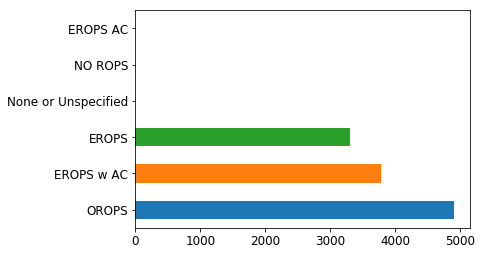

In [63]:
x.Enclosure.value_counts().plot.barh();

In [64]:
x.Enclosure

389125         EROPS
389126         EROPS
389127         EROPS
389128         EROPS
389129         EROPS
389130         EROPS
389131         EROPS
389132         EROPS
389133         EROPS
389134         EROPS
389135         EROPS
389136         OROPS
389137         EROPS
389138         OROPS
389139    EROPS w AC
389140         EROPS
389141    EROPS w AC
389142    EROPS w AC
389143    EROPS w AC
389144         EROPS
389145         EROPS
389146         EROPS
389147    EROPS w AC
389148         EROPS
389149    EROPS w AC
389150    EROPS w AC
389151         EROPS
389152         EROPS
389153         EROPS
389154         EROPS
             ...    
401095         EROPS
401096         EROPS
401097         EROPS
401098         EROPS
401099         EROPS
401100         EROPS
401101         EROPS
401102         EROPS
401103         EROPS
401104         EROPS
401105         EROPS
401106         EROPS
401107         EROPS
401108         EROPS
401109         EROPS
401110         EROPS
401111       

In [65]:
##So we can see that Enclosure are basically of three type here: - EROPS, EROPS w AC, OROPS
##Now, we are going to take the mean of SalePrice where Enclosure is EROPS, etc.

In [66]:
flds = ['Enclosure', 'SalePrice', 'pred', 'pred_std']
enc_summ = x[flds].groupby('Enclosure', as_index=False).mean()
enc_summ

,Enclosure,SalePrice,pred,pred_std
0,EROPS,9.849178,9.834640,0.278222
1,EROPS AC,NaN,NaN,NaN
2,EROPS w AC,10.623971,10.577877,0.266715
3,NO ROPS,NaN,NaN,NaN
4,None or Unspecified,NaN,NaN,NaN
5,OROPS,9.682064,9.684439,0.223225


In [67]:
##This is the plot of each type of Enclosure with the SalePrice and with predicted values 
##and represent error as standard deviation

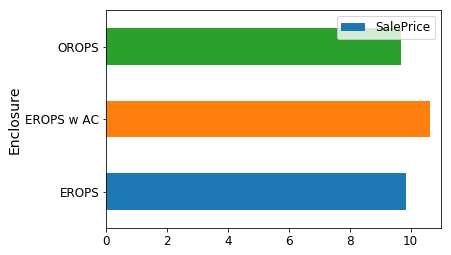

In [68]:
enc_summ = enc_summ[~pd.isnull(enc_summ.SalePrice)]
enc_summ.plot('Enclosure', 'SalePrice', 'barh', xlim=(0,11));

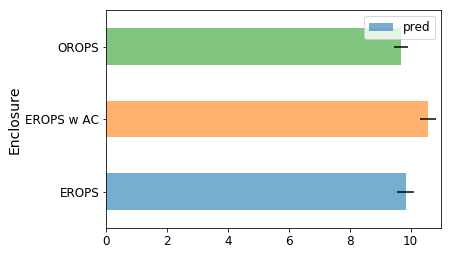

In [69]:
enc_summ.plot('Enclosure', 'pred', 'barh', xerr='pred_std', alpha=0.6, xlim=(0,11));

In [70]:
##Doing the similar with the Product size column

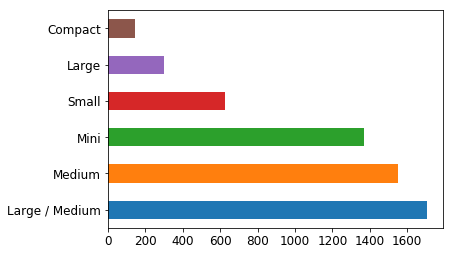

In [71]:
raw_valid.ProductSize.value_counts().plot.barh();

In [72]:
flds = ['ProductSize', 'SalePrice', 'pred', 'pred_std']
summ = x[flds].groupby(flds[0]).mean()
summ

,SalePrice,pred,pred_std
ProductSize,,,
Compact,9.735093,9.850201,0.359748
Large,10.470589,10.373999,0.365896
Large / Medium,10.691871,10.652051,0.300680
Medium,10.681511,10.626052,0.285625
Mini,9.535147,9.547420,0.253374
Small,10.324448,10.323954,0.312519


In [73]:
##Calculating the ratio of predicted_std / predicted_mean. And Large and Compact are worst in this becauze their predicted_std 
##much more as compare to other

In [74]:
(summ.pred_std/summ.pred).sort_values(ascending=False)

ProductSize
Compact           0.036522
Large             0.035270
Small             0.030271
Large / Medium    0.028227
Medium            0.026880
Mini              0.026539
dtype: float64

In [1]:
##So what we are doing over here is we are calculating the standard deviation of each row that we have got from the 
##Random Forest Model and then we group different variable based on standard deviation and then we will investigate why it is 
##happening. We will get the more standard deviation for the category of a variable which has a very less number of observations

# Feature Importance

In [75]:
##Now the next thing is that we should go for the feature importance. This will help us in knowing which are the most important
##columns in the model

In [76]:
rf_feat_importance

<function fastai.structured.rf_feat_importance(m, df)>

In [77]:
##This is fastai function

In [78]:
fi = rf_feat_importance(m, df_trn)

In [79]:
##Now we are going to retrive the top 10 important columns only

In [80]:
fi[:10]

,cols,imp
5,YearMade,0.170267
37,Coupler_System,0.112681
13,ProductSize,0.094411
14,fiProductClassDesc,0.083967
63,saleElapsed,0.051537
2,ModelID,0.051137
10,fiSecondaryDesc,0.049064
39,Hydraulics_Flow,0.046339
38,Grouser_Tracks,0.038494
19,Enclosure,0.038194


In [81]:
##Now we are going to plot this 

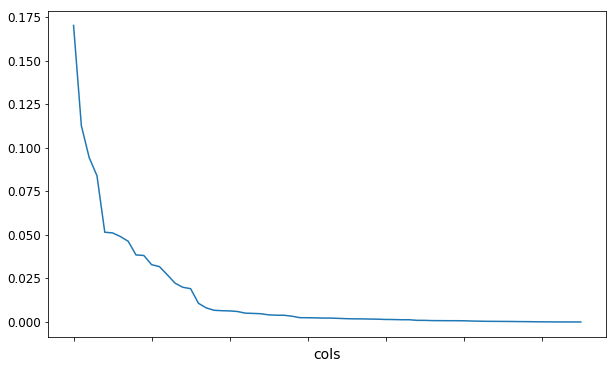

In [82]:
fi.plot('cols', 'imp', figsize=(10,6), legend=False)

In [83]:
##Now this tell us that there are bunch of columns which are not that much important. 
##So we are going to make the only few columns in order to predict the price
##Now visualize the same as a bar plot for the top 30 important columns

In [84]:
def plot_fi(fi): return fi.plot('cols', 'imp', 'barh', figsize=(12,7), legend=False)

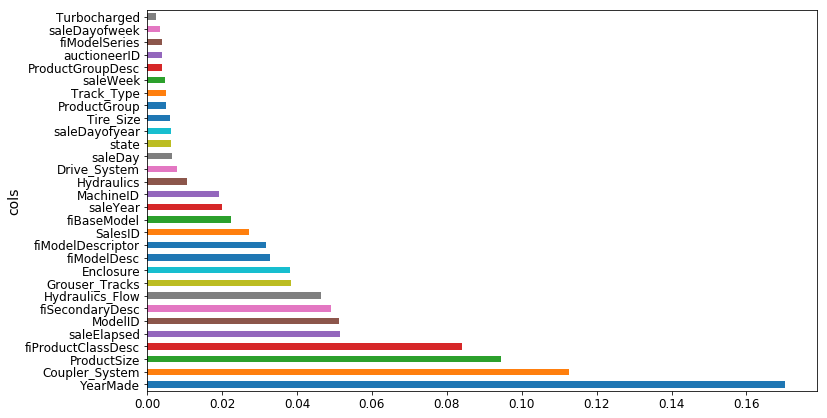

In [85]:
plot_fi(fi[:30]);

In [86]:
##Now we are going to take the new dataframe in which we will consider only those columns whoseimporatnce are greater than 0.005

In [87]:
keep = fi[fi.imp>0.005].cols

In [88]:
keep

5               YearMade
37        Coupler_System
13           ProductSize
14    fiProductClassDesc
63           saleElapsed
2                ModelID
10       fiSecondaryDesc
39       Hydraulics_Flow
38        Grouser_Tracks
19             Enclosure
8            fiModelDesc
12     fiModelDescriptor
0                SalesID
9            fiBaseModel
51              saleYear
1              MachineID
30            Hydraulics
18          Drive_System
54               saleDay
15                 state
56         saleDayofyear
35             Tire_Size
16          ProductGroup
Name: cols, dtype: object

In [89]:
len(keep)

23

In [90]:
data_new = df_trn[keep].copy()
data_new.transpose()

,0,1,2,3,4,5,6,7,8,9,...,401115,401116,401117,401118,401119,401120,401121,401122,401123,401124
YearMade,2004,1996,2001,2001,2007,2004,1993,2001,2008,1000,...,2005,2005,2005,2006,2005,2005,2005,2005,2005,2005
Coupler_System,0,0,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ProductSize,0,4,0,6,0,0,3,0,5,2,...,5,5,5,5,5,5,5,5,5,5
fiProductClassDesc,59,62,39,8,40,2,14,2,17,68,...,17,17,17,17,13,17,17,17,13,13
saleElapsed,1163635200,1080259200,1077753600,1305763200,1248307200,1229558400,1093478400,1132185600,1251331200,1186617600,...,1319500800,1319500800,1319500800,1319500800,1319500800,1320192000,1320192000,1320192000,1319500800,1319500800
ModelID,3157,77,7009,332,17311,4605,1937,3539,36003,3883,...,21437,21437,21437,21437,21435,21439,21439,21439,21435,21435
fiSecondaryDesc,41,55,0,0,0,57,48,41,62,21,...,101,101,101,101,106,106,106,106,106,106
Hydraulics_Flow,0,0,3,0,3,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Grouser_Tracks,0,0,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Enclosure,3,3,6,3,1,6,1,6,1,3,...,1,1,1,1,1,1,1,1,1,1


In [91]:
X_train, X_valid = split_vals(data_new, n_trn)

In [92]:
n = RandomForestRegressor(n_estimators=40, n_jobs=-1, max_features=0.5, min_samples_leaf=3, oob_score=True)
%time n.fit(X_train, y_train)
print_score(n)

Wall time: 9.75 s
[0.20751395676690917, 0.24778991149848792, 0.9100027065421435, 0.8903483389058837, 0.8936468168793457]


In [93]:
##This make the slightly better preformance
##Now again calculating the feature importance will change the graph little bit.

In [94]:
fi = rf_feat_importance(n,data_new)
fi[:10]

,cols,imp
0,YearMade,0.174438
2,ProductSize,0.104408
1,Coupler_System,0.095616
3,fiProductClassDesc,0.082291
5,ModelID,0.055736
4,saleElapsed,0.052870
9,Enclosure,0.049349
7,Hydraulics_Flow,0.047636
6,fiSecondaryDesc,0.047284
8,Grouser_Tracks,0.045086


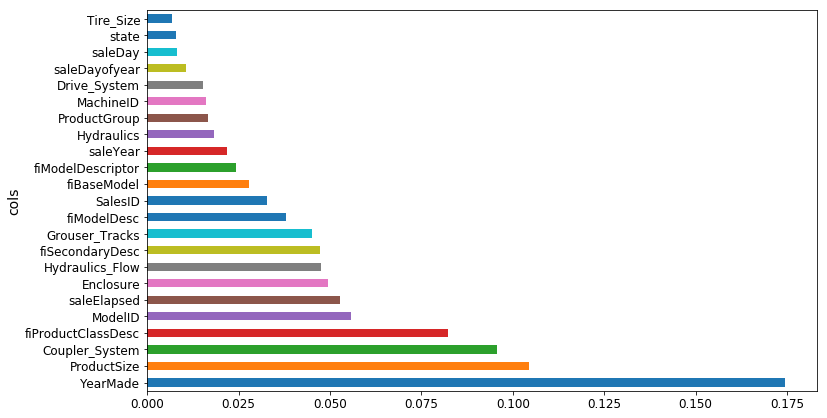

In [95]:
plot_fi(fi)

In [96]:
##Now here we can see the difference in the coupler system graph. Morever one can trust this barplot much more as compare to the
##earlier one because now all the non-dependent columns has been removed from the dataframe. 

# One Hot Encoding

In [97]:
##Now we are going for the one-hot encoding. When we have categorical values, random forest make binary decision to check for 
##the best classification. But if the categorical values are more, then we will get the best classification in more than one
##binary classification which is highly inefficient. So what we can do we can make the new columns of the categorical value and
##and then pass it to the random forest to make the best classification and this will be donein only one step.

In [98]:
data.head().transpose()

,0,1,2,3,4
SalesID,1139246,1139248,1139249,1139251,1139253
SalePrice,11.0974,10.9508,9.21034,10.5584,9.30565
MachineID,999089,117657,434808,1026470,1057373
ModelID,3157,77,7009,332,17311
datasource,121,121,121,121,121
auctioneerID,3,3,3,3,3
YearMade,2004,1996,2001,2001,2007
MachineHoursCurrentMeter,68,4640,2838,3486,722
UsageBand,Low,Low,High,High,Medium
fiModelDesc,521D,950FII,226,PC120-6E,S175


In [99]:
##max_n_cat parameter will help us in one hot encoding. In below case it will convert any categorical columns with less than 
##7 level into a new columns

In [100]:
df_train, y_train, nas = proc_df(data, 'SalePrice', max_n_cat=7)

In [101]:
df_train

,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,fiModelDesc,fiBaseModel,fiSecondaryDesc,...,Differential_Type_Locking,Differential_Type_No Spin,Differential_Type_Standard,Differential_Type_nan,Steering_Controls_Command Control,Steering_Controls_Conventional,Steering_Controls_Four Wheel Standard,Steering_Controls_No,Steering_Controls_Wheel,Steering_Controls_nan
0,1139246,999089,3157,121,3.0,2004,68.0,950,296,41,...,0,0,1,0,0,1,0,0,0,0
1,1139248,117657,77,121,3.0,1996,4640.0,1725,527,55,...,0,0,1,0,0,1,0,0,0,0
2,1139249,434808,7009,121,3.0,2001,2838.0,331,110,0,...,0,0,0,1,0,0,0,0,0,1
3,1139251,1026470,332,121,3.0,2001,3486.0,3674,1375,0,...,0,0,0,1,0,0,0,0,0,1
4,1139253,1057373,17311,121,3.0,2007,722.0,4208,1529,0,...,0,0,0,1,0,0,0,0,0,1
5,1139255,1001274,4605,121,3.0,2004,508.0,493,175,57,...,0,0,0,1,0,0,0,0,0,1
6,1139256,772701,1937,121,3.0,1993,11540.0,1453,419,48,...,0,0,0,1,0,0,0,0,0,1
7,1139261,902002,3539,121,3.0,2001,4883.0,740,243,41,...,0,0,0,1,0,0,0,0,0,1
8,1139272,1036251,36003,121,3.0,2008,302.0,779,250,62,...,0,0,0,1,0,0,0,0,0,1
9,1139275,1016474,3883,121,3.0,1000,20700.0,1771,540,21,...,0,0,1,0,0,1,0,0,0,0


In [102]:
y_train

array([11.09741, 10.95081,  9.21034, ...,  9.3501 ,  9.10498,  8.95545])

In [103]:
nas

{'auctioneerID': 2.0, 'MachineHoursCurrentMeter': 0.0}

In [104]:
##Splitting the data into validation and training set

In [105]:
X_train, X_valid = split_vals(df_train, n_trn)
y_train, y_valid = split_vals(y_train, n_trn)

In [106]:
m = RandomForestRegressor(n_estimators=40, max_features=0.6, min_samples_leaf=3, n_jobs=-1, oob_score=True)
m.fit(X_train,y_train)
print_score(m)

[0.20735480262394268, 0.25327078271045106, 0.9101407015917812, 0.8854439160575659, 0.8924569381869704]


In [107]:
##Now as we can see that there is decrease in the r^2 score but this is not always the case. This entirely depends on the 
##dataset that you are dealing with.

In [108]:
##But now since new columns are added using the columnname_categoricallevelname. So we can again go for the feature importance

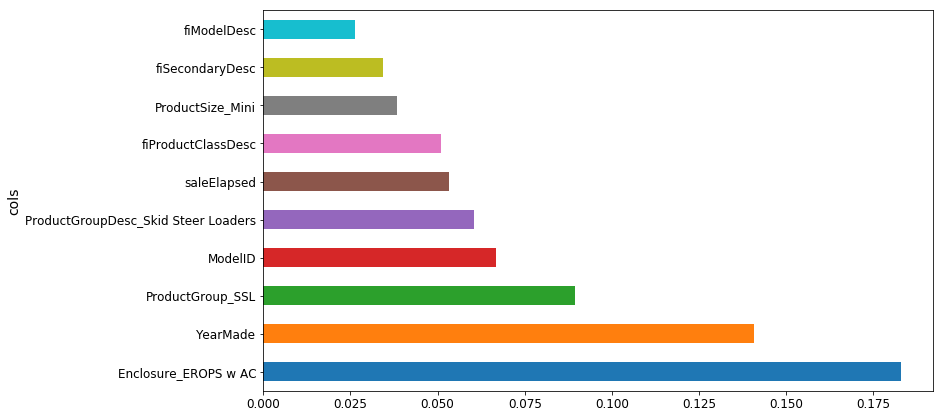

In [109]:
fi = rf_feat_importance(m, df_train)
plot_fi(fi[:10])

In [110]:
##So previously enclosure was not that much important but now enclosure's AC is the most important one. And numbers of level in
##category is known as Cardinality. Like UsageBand has cardinality = 3 ('low','medium','high')

# Removing Reduntant Feature

In [111]:
##Now since there are more number of columns and more of them will be reduntant. So we are going to remove them using the 
##cluster analysis(hierarchial clustering). For this we are also going to plot the dendrogram

In [112]:
from scipy.cluster import hierarchy as hc

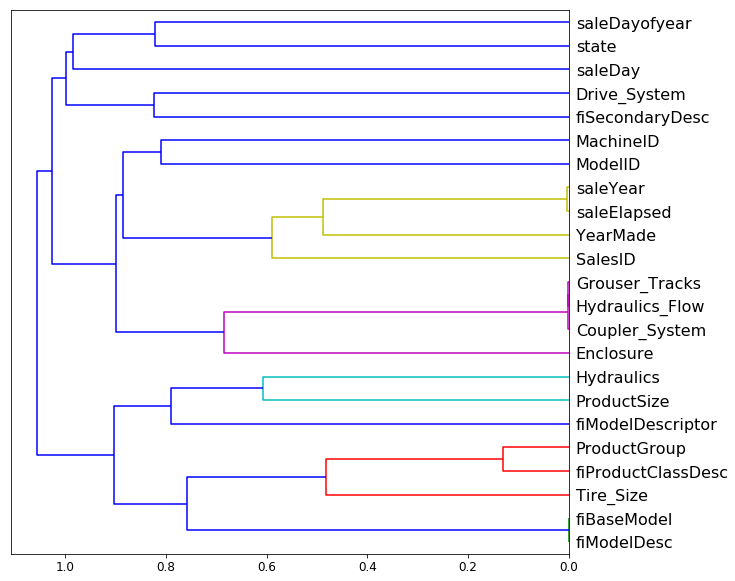

In [113]:
corr = np.round(scipy.stats.spearmanr(data_new).correlation, 4)
corr_condensed = hc.distance.squareform(1-corr)
z = hc.linkage(corr_condensed, method='average')
fig = plt.figure(figsize=(10,10))
dendrogram = hc.dendrogram(z, labels=data_new.columns, orientation='left', leaf_font_size=16)
plt.show()

In [114]:
##spearmanr is rank correlation and we can also see that saleYear and saleElapsed are closely related to each other.

In [115]:
##So here we are having 6 redentant columns. Now we are going to drop them one by one and see the oob_score.
##function of calculating oob score and for deploying random forest model

In [116]:
def get_oob(df):
    m = RandomForestRegressor(n_estimators=30, min_samples_leaf=5, max_features=0.6, n_jobs=-1, oob_score=True)
    x, _ = split_vals(df, n_trn)
    m.fit(x, y_train)
    return m.oob_score_

In [117]:
##Calculating oob_score for the complete dataset

In [118]:
get_oob(data_new)

0.8902544817105261

In [119]:
##Now droping each columns one by one and see the oob_score

In [120]:
for c in ('saleYear', 'saleElapsed', 'fiModelDesc', 'fiBaseModel', 'Grouser_Tracks', 'Coupler_System'):
    print(c, get_oob(data_new.drop(c, axis=1)))

saleYear 0.8890830397058456
saleElapsed 0.8873651593380283
fiModelDesc 0.8886111523248235
fiBaseModel 0.8893367699466161
Grouser_Tracks 0.8897078074330074
Coupler_System 0.8898139331082727


In [121]:
##Now we will drop 3 columns
to_drop = ['saleYear', 'fiBaseModel','Grouser_Tracks']
get_oob(data_new.drop(to_drop, axis = 1))

0.8893849497115228

In [122]:
##This is quite better so use it and then saving the columns name and then loading the same file

In [123]:
data_new.drop(to_drop, inplace=True, axis = 1)
X_train, X_valid = split_vals(data_new, n_trn)

In [124]:
np.save('tmp/keep_cols.npy',np.array(data_new.columns))

In [125]:
keep_cols = np.load('tmp/keep_cols.npy')
data_new = df_trn[keep_cols]
data_new.columns

Index(['YearMade', 'Coupler_System', 'ProductSize', 'fiProductClassDesc',
       'saleElapsed', 'ModelID', 'fiSecondaryDesc', 'Hydraulics_Flow',
       'Enclosure', 'fiModelDesc', 'fiModelDescriptor', 'SalesID', 'MachineID',
       'Hydraulics', 'Drive_System', 'saleDay', 'state', 'saleDayofyear',
       'Tire_Size', 'ProductGroup'],
      dtype='object')

In [126]:
##Running this model on full dataset

In [127]:
reset_rf_samples()

In [128]:
m = RandomForestRegressor(n_estimators=40, max_features=0.5, min_samples_leaf=3, oob_score=True, n_jobs=-1)
m.fit(X_train,y_train)
print_score(m)

[0.12486204673829825, 0.22648059829654518, 0.9674166506145481, 0.9083969400526939, 0.9090499778808234]


# Partial Dependence

In [129]:
##Now we are going to make the use of technique known as partial dependence

In [130]:
from pdpbox import pdp
from plotnine import *

In [131]:
set_rf_samples(50000)

In [132]:
df_trn2, y_trn, nas = proc_df(data, 'SalePrice', max_n_cat=7)
X_train, X_valid = split_vals(df_trn2, n_trn)

In [133]:
m = RandomForestRegressor(n_estimators=40, n_jobs=-1, max_features=0.6, min_samples_leaf=3)
m.fit(X_train, y_train)
print_score(m)

[0.2072797247450824, 0.25468236421598595, 0.9102057613258909, 0.8841634219365994]


In [134]:
fi = rf_feat_importance(m, df_trn2)
fi[:10]

,cols,imp
67,Enclosure_EROPS w AC,0.188113
5,YearMade,0.137231
48,ProductGroup_SSL,0.070115
55,ProductGroupDesc_Skid Steer Loaders,0.066268
2,ModelID,0.065704
12,fiProductClassDesc,0.052161
32,saleElapsed,0.051132
43,ProductSize_Mini,0.036431
9,fiSecondaryDesc,0.035297
7,fiModelDesc,0.026077


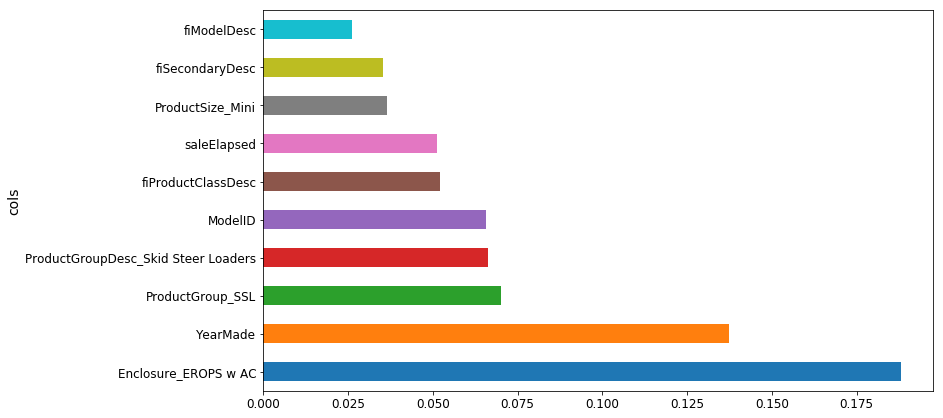

In [135]:
plot_fi(fi[:10])

In [136]:
##So here we got the top ten important features after doing one hot encoding. Now lets get insight into these top ten features

In [137]:
##saleElapsed and YearMade can be both use together in order to calculate how old the product is when it is sold

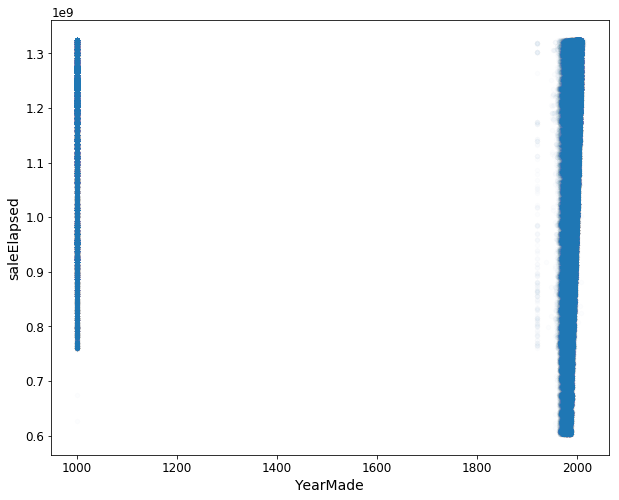

In [138]:
data.plot('YearMade','saleElapsed','scatter', alpha=0.01, figsize=(10,8))

In [139]:
##Now we are going to pickup 500 random samples and then we are going to use them for plotting purpose

In [140]:
x_all = get_sample(data[data.YearMade>1930], 500)

In [141]:
x_all

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,...,saleDay,saleDayofweek,saleDayofyear,saleIs_month_end,saleIs_month_start,saleIs_quarter_end,saleIs_quarter_start,saleIs_year_end,saleIs_year_start,saleElapsed
380,1140492,11.184421,980380,90,121,3.0,1994,24827.0,High,980FII,...,18,3,291,False,False,False,False,False,False,1192665600
3806,1151995,9.546813,1022975,17444,121,3.0,2001,1150.0,Medium,LS190,...,18,3,138,False,False,False,False,False,False,1147910400
3907,1152348,10.896739,1055511,16516,121,3.0,2004,4963.0,Medium,PC220LC7,...,28,3,28,False,False,False,False,False,False,1264636800
3948,1152464,9.392662,1061180,18135,121,3.0,2002,521.0,Low,EC15B,...,15,3,319,False,False,False,False,False,False,1195084800
5268,1156979,9.047821,1005410,8016,121,3.0,2002,0.0,NaN,260,...,25,3,237,False,False,False,False,False,False,1124928000
8798,1168924,10.275051,1065616,1934,121,3.0,1989,12792.0,Medium,772BH,...,30,3,274,True,False,True,False,False,False,1096502400
10359,1174122,10.373491,26245,1578,121,3.0,2000,3240.0,Medium,D5CLGP,...,30,3,274,True,False,True,False,False,False,1096502400
10629,1174657,10.021271,1013597,5162,121,3.0,2000,0.0,NaN,214E,...,16,3,351,False,False,False,False,False,False,1103155200
11303,1176082,10.221941,1014774,9055,121,3.0,1993,7252.0,Medium,PC300,...,13,3,347,False,False,False,False,False,False,1197504000
12370,1179776,9.581904,1045055,18828,121,3.0,1998,1225.0,Low,HE130LC,...,15,3,136,False,False,False,False,False,False,1210809600


In [142]:
##ggplot is the R package which is also known as grammer of graphics. ggplot deploy linear regression model for small subsamples
##so that we can smooth line (loess is used for this purpose only). It also shows tha confidence values also means error %.

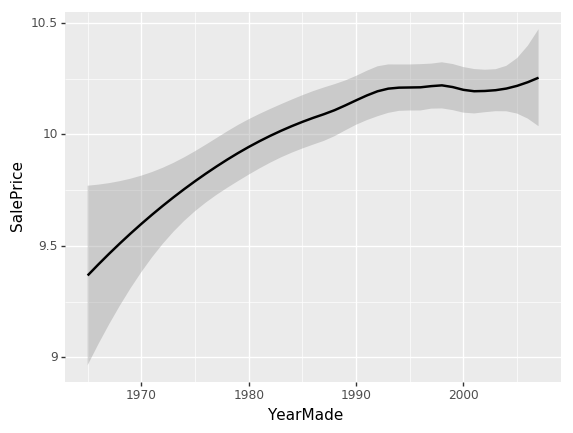

<ggplot: (124065552406)>

In [143]:
ggplot(x_all, aes('YearMade', 'SalePrice'))+stat_smooth(se='True',method='loess')

In [144]:
##Now we are going to plot the paratial dependency plot using the pdp library.
##For this we are first going to pick up the 500 random samples for plotting purpose

In [145]:
x = get_sample(X_train[X_train.YearMade>1930], 500)
x

,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,fiModelDesc,fiBaseModel,fiSecondaryDesc,...,Differential_Type_Locking,Differential_Type_No Spin,Differential_Type_Standard,Differential_Type_nan,Steering_Controls_Command Control,Steering_Controls_Conventional,Steering_Controls_Four Wheel Standard,Steering_Controls_No,Steering_Controls_Wheel,Steering_Controls_nan
1120,1143022,1021648,16770,121,3.0,2004,1211.0,3287,1141,41,...,0,0,0,1,0,0,0,0,0,1
1390,1143931,560663,3537,121,3.0,1995,7316.0,736,243,21,...,0,0,0,1,0,0,0,0,0,1
1505,1144316,1021086,3172,121,3.0,2004,1285.0,1065,324,91,...,0,0,0,1,0,0,0,0,0,1
4615,1154790,1067000,4607,121,3.0,2004,1943.0,498,175,122,...,0,0,0,1,0,0,0,0,0,1
4717,1155118,1001142,1878,121,3.0,2003,0.0,999,308,59,...,0,0,0,1,0,0,0,0,0,1
6765,1162048,1044607,9552,121,3.0,2000,1659.0,1433,413,0,...,0,0,0,1,0,0,0,0,0,1
7082,1163054,817106,13395,121,3.0,2003,318.0,458,167,0,...,0,0,0,1,0,0,0,0,0,1
7697,1165209,1056535,250,121,3.0,2002,2981.0,2230,707,113,...,0,0,0,1,0,0,0,0,0,1
8133,1166649,1014089,1355,121,3.0,1997,16947.0,646,208,0,...,0,0,0,1,0,0,0,0,0,1
8275,1167116,732410,75,121,3.0,2005,8768.0,1711,521,57,...,0,0,1,0,0,1,0,0,0,0


In [146]:
def plot_pdp(feat, clusters=None, feat_name=None):
    feat_name = feat_name or feat
    p = pdp.pdp_isolate(m, x, x.columns, feat)
    return pdp.pdp_plot(p, feat_name, plot_lines=True,
                        cluster=clusters is not None,
                        n_cluster_centers=clusters)

In [147]:
##So plot_pdp is taking a year and replace all the year with that particular year and then predicting the price. For example 
##if range of Year starts from 1960, then first we are going to replace the entire YearMade columns with 1960 and then 
##predicting the price by averaging all the SalePrice for that Year and then plotting it and then proceeding with 1961

In [148]:
##This blue line are showing the price of all the 500 samples in each year and dark yellow line is average of all the 500 lines

(<Figure size 1080x684 with 2 Axes>,
 {'title_ax': <matplotlib.axes._subplots.AxesSubplot at 0x1ce1b2d6630>,
  'pdp_ax': <matplotlib.axes._subplots.AxesSubplot at 0x1ce1b3bf4e0>})

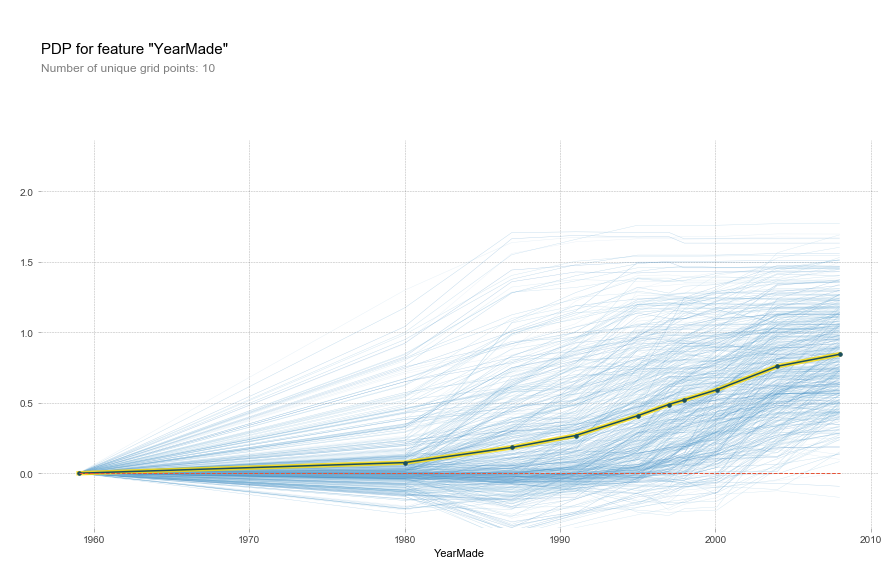

In [149]:
plot_pdp('YearMade') 

In [150]:
##This basically cluster the complete 500 samples into 5 cluster

(<Figure size 1080x684 with 2 Axes>,
 {'title_ax': <matplotlib.axes._subplots.AxesSubplot at 0x1ce20b89898>,
  'pdp_ax': <matplotlib.axes._subplots.AxesSubplot at 0x1ce20b5a0b8>})

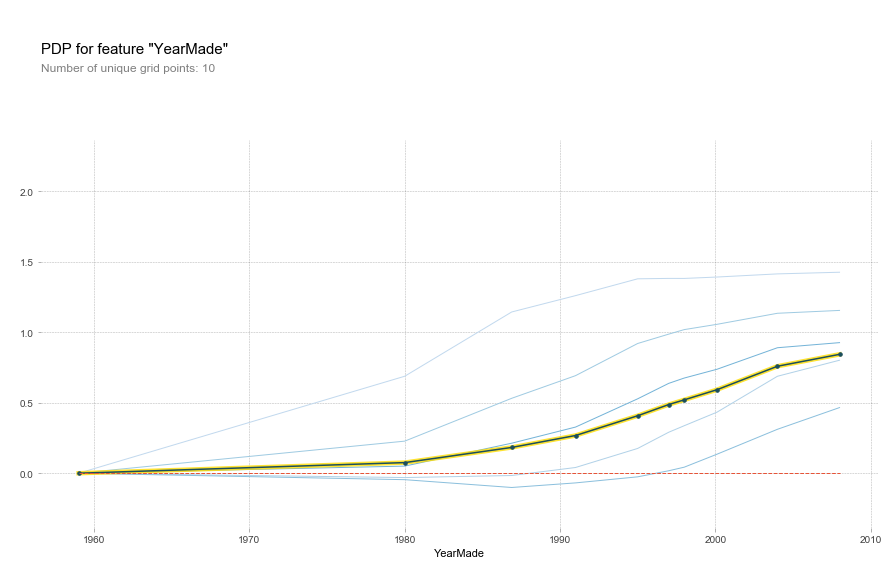

In [151]:
plot_pdp('YearMade', clusters=5)

In [152]:
##pdp interaction plot. This will tell you how saleElapsed and YearMade together impact the SalePrice. 

TypeError: clabel() got an unexpected keyword argument 'contour_label_fontsize'

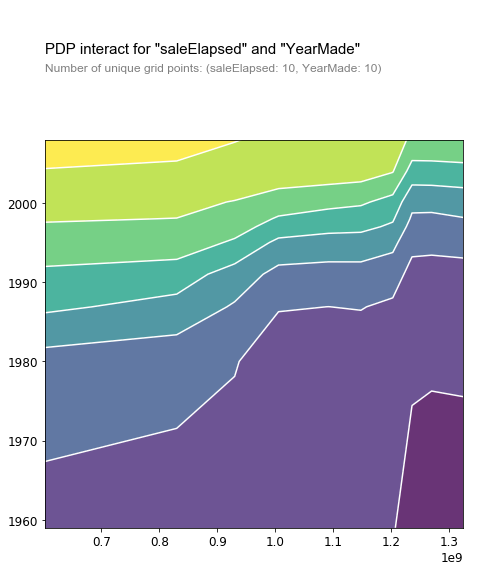

In [153]:
feats = ['saleElapsed', 'YearMade']
p = pdp.pdp_interact(m, x, x.columns, feats)
pdp.pdp_interact_plot(p, feats)

(<Figure size 1080x684 with 2 Axes>,
 {'title_ax': <matplotlib.axes._subplots.AxesSubplot at 0x1ce25a0c588>,
  'pdp_ax': <matplotlib.axes._subplots.AxesSubplot at 0x1ce25a3b860>})

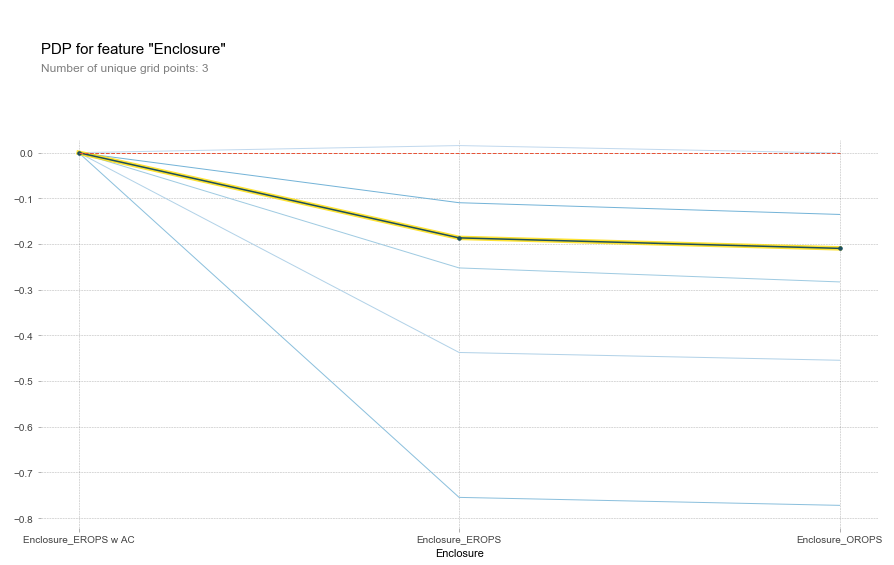

In [154]:
plot_pdp(['Enclosure_EROPS w AC', 'Enclosure_EROPS', 'Enclosure_OROPS'], 5, 'Enclosure')

In [155]:
##If everything is same in bulldozer then the bulldozer with Enclosure_EROPS w AC is very much costly then other categories.
##Now we are setting the YearMade<1950 to 1950 and adding a new column known as age which is SaleYear - YearMade

In [156]:
data.YearMade[data.YearMade<1950] = 1950
data_new['age'] = data['age'] = data.saleYear-data.YearMade

In [157]:
##Deploying model on that

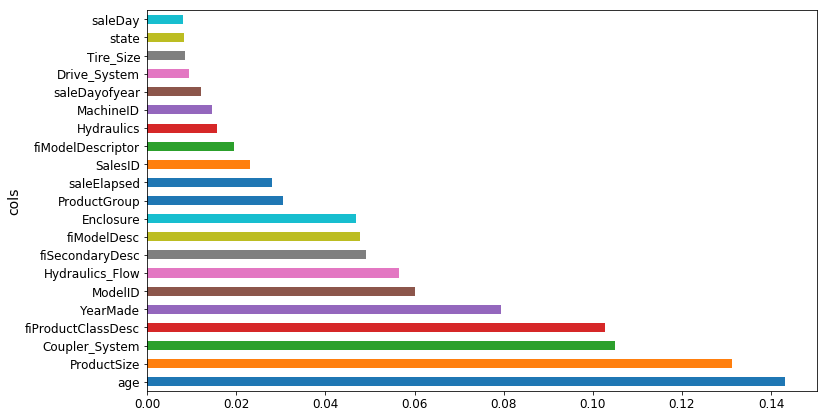

In [158]:
X_train, X_valid = split_vals(data_new, n_trn)
m = RandomForestRegressor(n_estimators=40, min_samples_leaf=3, max_features=0.6, n_jobs=-1)
m.fit(X_train, y_train)
plot_fi(rf_feat_importance(m, data_new));

In [159]:
print_score(m)

[0.20668822210365165, 0.24568036470411259, 0.9107175117719262, 0.8922074191501823]


# Tree Interpreter

In [160]:
##Now as we can see that the most important feature is now age.
##And now we are going to look at the tree interpreter

In [163]:
from treeinterpreter import treeinterpreter as ti

In [166]:
df_train, df_valid = split_vals(data[data_new.columns], n_trn)

In [167]:
row = X_valid.values[None,0]
row

array([[      1999,          0,          5,         17, 1284595200,        665,          0,          0,
                 1,       3232,          0,    4364751,    2300944,         12,          0,         16,
                35,        259,          0,          4,         11]], dtype=int64)

In [168]:
prediction, bias, contribution = ti.predict(m, row)

In [170]:
##Prediction will tell you about the predicted sale price. bias will tell you about the average sale price. contribution will 
##tell you which column with which label has the most contribution for the prediction

In [173]:
prediction[0]

array([9.31013])

In [174]:
bias[0]

10.104860585504024

In [172]:
contribution

array([[ 0.04879,  0.04739, -0.51128, -0.18405,  0.02703,  0.04594, -0.04141,  0.02359, -0.05186, -0.09151,
        -0.02491, -0.02716,  0.00785,  0.01781,  0.00217, -0.00499, -0.0028 ,  0.00144, -0.00689,  0.0285 ,
        -0.09838]])

In [175]:
##Getting more insight into the contribution part

In [176]:
idx = np.argsort(contribution[0])

In [177]:
idx

array([ 2,  3, 20,  9,  8,  6, 11, 10, 18, 15, 16, 17, 14, 12, 13,  7,  4, 19,  5,  1,  0], dtype=int64)

In [179]:
[o for o in zip(data_new.columns[idx], df_valid.iloc[0][idx], contribution[0][idx])]

[('ProductSize', 'Mini', -0.5112849185778803),
 ('fiProductClassDesc',
  'Hydraulic Excavator, Track - 3.0 to 4.0 Metric Tons',
  -0.18404826909741936),
 ('age', 11, -0.09837870373804361),
 ('fiModelDesc', 'KX1212', -0.09151100691422562),
 ('Enclosure', 'EROPS', -0.051856584978034984),
 ('fiSecondaryDesc', nan, -0.04140529151938725),
 ('SalesID', 4364751, -0.027158319433116286),
 ('fiModelDescriptor', nan, -0.024906806467221366),
 ('Tire_Size', nan, -0.006885788449751429),
 ('saleDay', 16, -0.004986726257600082),
 ('state', 'Ohio', -0.002804188110602501),
 ('saleDayofyear', 259, 0.0014428854280080562),
 ('Drive_System', nan, 0.0021683790278828052),
 ('MachineID', 2300944, 0.007847824790418567),
 ('Hydraulics', 'Standard', 0.01780708375992197),
 ('Hydraulics_Flow', nan, 0.023585458083144762),
 ('saleElapsed', 1284595200, 0.027025180978330576),
 ('ProductGroup', 'TEX', 0.028502362911824085),
 ('ModelID', 665, 0.04593538178959409),
 ('Coupler_System', nan, 0.04738672203362504),
 ('YearMad

In [180]:
##This shows that YearMade with 1999 has the more contribution towards the prediction

In [182]:
l = contribution[0].sum()
l

-0.7947344481565033

In [183]:
##Now if we will add this to the bias we will get the predicted value

In [185]:
pre = bias[0] + l
pre

9.31012613734752

# Extrapolation

In [186]:
##Now still our model's validation score < oob_score. It means we can still make it better. So we will go for Extrapolation.

In [187]:
##Now as we know linear regression can be used to expolate the price next several months but this cann't be done with 
##RandomForest. But for this we can make the use of technique in which we can drop all the time dependent variable as predictors

In [188]:
##Now one important point is that we are going to create a new columns is_valid to predict whether this row is in 
##validation set or not.
##If the variables are not time dependent then won't be possible to predict whether it is in validation set or not.

In [189]:
df_ext = data_new.copy()
df_ext['is_valid'] = 1
df_ext.is_valid[:n_trn] = 0
x, y, nas = proc_df(df_ext, 'is_valid')

In [190]:
x

,YearMade,Coupler_System,ProductSize,fiProductClassDesc,saleElapsed,ModelID,fiSecondaryDesc,Hydraulics_Flow,Enclosure,fiModelDesc,...,SalesID,MachineID,Hydraulics,Drive_System,saleDay,state,saleDayofyear,Tire_Size,ProductGroup,age
0,2004,0,0,59,1163635200,3157,41,0,3,950,...,1139246,999089,1,0,16,1,320,17,6,2
1,1996,0,4,62,1080259200,77,55,0,3,1725,...,1139248,117657,1,0,26,33,86,12,6,8
2,2001,1,0,39,1077753600,7009,0,3,6,331,...,1139249,434808,4,0,26,32,57,0,3,3
3,2001,0,6,8,1305763200,332,0,0,3,3674,...,1139251,1026470,1,0,19,44,139,0,4,10
4,2007,1,0,40,1248307200,17311,0,3,1,4208,...,1139253,1057373,4,0,23,32,204,0,3,2
5,2004,0,0,2,1229558400,4605,57,0,6,493,...,1139255,1001274,0,2,18,3,353,0,1,4
6,1993,0,3,14,1093478400,1937,48,0,1,1453,...,1139256,772701,12,0,26,9,239,0,4,11
7,2001,0,0,2,1132185600,3539,41,0,6,740,...,1139261,902002,0,2,17,13,321,0,1,4
8,2008,0,5,17,1251331200,36003,62,0,1,779,...,1139272,1036251,4,0,27,44,239,0,4,1
9,1000,0,2,68,1186617600,3883,21,0,3,1771,...,1139275,1016474,1,0,9,9,221,17,6,57


In [191]:
y

array([0, 0, 0, ..., 1, 1, 1], dtype=int64)

In [192]:
nas

{}

In [194]:
m = RandomForestRegressor(n_estimators=40, min_samples_leaf=3, max_features=0.5, oob_score=True, n_jobs=-1)
m.fit(x,y)
m.oob_score_

0.9995619872385992

In [195]:
##Since 0.999 is very good accuracy which mean we can predict wether this row is from validation set or not. Since it can 
##predict this with the accuracy = 0.999 so it has time dependent variable and now we have to remove them

In [196]:
fi = rf_feat_importance(m,x)
fi[:10]

,cols,imp
11,SalesID,0.774729
4,saleElapsed,0.144584
12,MachineID,0.061697
17,saleDayofyear,0.007246
0,YearMade,0.003276
5,ModelID,0.002335
9,fiModelDesc,0.001510
1,Coupler_System,0.001126
7,Hydraulics_Flow,0.000845
20,age,0.000768


In [197]:
##So with the imp values of the top three we can know that top3 are much more important then anyone else.

In [198]:
feats = ['SalesID', 'saleElapsed', 'MachineID']

In [199]:
(X_train[feats]/1000).describe()

,SalesID,saleElapsed,MachineID
count,389125.000000,3.891250e+05,389125.000000
mean,1800.452485,1.084797e+06,1206.796148
std,595.627288,1.803913e+05,430.850552
min,1139.246000,6.009984e+05,0.000000
25%,1413.348000,9.666432e+05,1087.016000
50%,1632.093000,1.134605e+06,1273.859000
75%,2210.453000,1.234138e+06,1458.661000
max,4364.741000,1.325117e+06,2313.821000


In [200]:
(X_valid[feats]/1000).describe()

,SalesID,saleElapsed,MachineID
count,12000.000000,1.200000e+04,12000.000000
mean,5786.967651,1.306609e+06,1578.049709
std,836.899608,2.497808e+04,589.497173
min,4364.751000,1.174522e+06,0.830000
25%,4408.580750,1.309219e+06,1271.225250
50%,6272.538500,1.316045e+06,1825.317000
75%,6291.792250,1.321402e+06,1907.858000
max,6333.342000,1.325203e+06,2486.330000


In [202]:
##So from the mean of each of the three we can know that they are very different in validation set and training set.
##So droping them

In [203]:
x.drop(feats, axis=1, inplace=True)

In [204]:
m = RandomForestRegressor(n_estimators=40, min_samples_leaf=3, max_features=0.5, oob_score=True, n_jobs=-1)
m.fit(x,y)
m.oob_score_

0.5111526172699288

In [206]:
##Still new have good accuracy for validation set prediction means still we have time dependent variable. So doing the same again

In [205]:
fi = rf_feat_importance(m,x)
fi[:10]

,cols,imp
17,age,0.232534
0,YearMade,0.189641
14,saleDayofyear,0.156371
4,ModelID,0.076305
8,fiModelDesc,0.064521
12,saleDay,0.058591
13,state,0.057441
3,fiProductClassDesc,0.034047
5,fiSecondaryDesc,0.023364
7,Enclosure,0.022403


In [207]:
##age and YearMade can be time dependent variable. So we can remove them also

In [210]:
set_rf_samples = 50000

In [216]:
feats = ['SalesID', 'saleElapsed', 'MachineID', 'age', 'YearMade', 'saleDayofyear']

In [212]:
##This model is deploy on 50000 rows without droping any time dependent variables.

In [213]:
X_train, X_valid = split_vals(data_new, n_trn)
m = RandomForestRegressor(n_estimators=40, min_samples_leaf=3, max_features=0.5, oob_score=True, n_jobs=-1)
m.fit(X_train,y_train)
print_score(m)

[0.20787882881588193, 0.2498601744255779, 0.9096859435977723, 0.8885084247426752, 0.8932074799047081]


In [215]:
##Dropping each row in feats one by one and checking the performance of the model

In [217]:
for f in feats:
    df_subs = data_new.drop(f, axis=1)
    X_train, X_valid = split_vals(df_subs, n_trn)
    m = RandomForestRegressor(n_estimators=40, min_samples_leaf=3, max_features=0.5, n_jobs=-1, oob_score=True)
    m.fit(X_train, y_train)
    print(f)
    print_score(m)

SalesID
[0.20838847908059951, 0.2444144522787358, 0.9092425602435291, 0.8933153987042142, 0.8930584085234322]
saleElapsed
[0.21396935168572412, 0.25477404148419514, 0.9043162984710366, 0.884080012216275, 0.8872463868039344]
MachineID
[0.2066080351139724, 0.24523700393477108, 0.9107867745980849, 0.8925961183384933, 0.8950162034169484]
age
[0.2088535183547774, 0.2484200616907458, 0.9088370400607111, 0.8897899233141646, 0.8921731838607808]
YearMade
[0.20849317167213666, 0.25036687098273375, 0.9091513458119005, 0.8880557741471278, 0.8925620877446006]
saleDayofyear
[0.2085367493148312, 0.24304359736022857, 0.9091133648660834, 0.8945087730983633, 0.8930297462059881]


In [218]:
##Performance of the model goes down on dropping saleElapsed, age, YearMade. 
##So we don't need to drop these columns else we can drop.

In [219]:
reset_rf_samples()

In [221]:
df_subs = data_new.drop(['SalesID', 'MachineID', 'saleDayofyear'], axis=1)
X_train, X_valid = split_vals(df_subs, n_trn)
m = RandomForestRegressor(n_estimators=40, min_samples_leaf=3, max_features=0.5, n_jobs=-1, oob_score=True)
m.fit(X_train, y_train)
print_score(m)

[0.13740632158681304, 0.21807614093879257, 0.9605408020772728, 0.9150693827121118, 0.9094013638748505]


In [222]:
##So now our validation set score > oob_score and new have also remove the time dependent variable. So now we can save the model

In [223]:
##feature importance

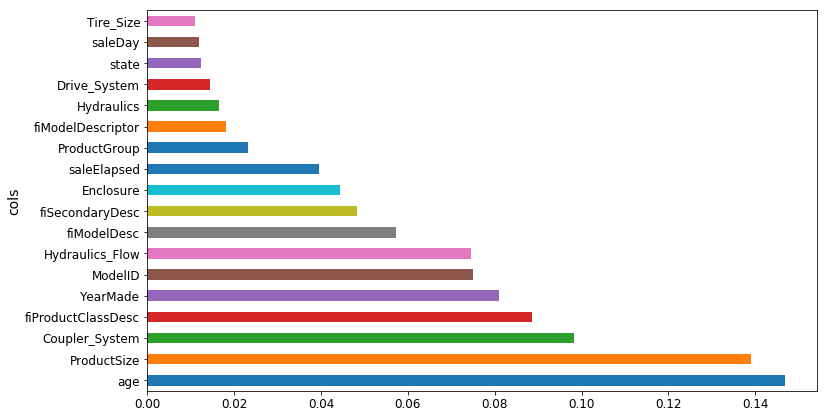

In [224]:
plot_fi(rf_feat_importance(m, X_train));

In [225]:
np.save('tmp/subs_cols.npy', np.array(df_subs.columns))

# Final Model

In [226]:
##Now deploying our final model with 160 trees.

In [227]:
m = RandomForestRegressor(n_estimators=160, max_features=0.5, n_jobs=-1, oob_score=True)
%time m.fit(X_train, y_train)
print_score(m)

Wall time: 1min 59s
[0.08016056742711405, 0.21169643811122524, 0.9865706067434008, 0.9199658981253963, 0.914625991282503]


In [228]:
##Now we are on 1st position in kaggle competetion 

In [2]:
##Remember how big we need the validation is depend on the problem that we are solving.
##Procedure: - 
##Initially take 1000, 2000 sample as validation set and train five model on training and then calculate the
##accuracy on the validation set and then chekc whether this accuracy is good for the further development. If no increase the 
##size of the validation set or you can also go for the cross-validation technique.

In [3]:
##Suppose if you have a single entry from a class then put it in the training set not in the validation and testing set and this
##type of learning is known as single shot learning. And there also exists a sero shot learning.

##Morever if suppose any class is less in number as compare to other classes then replicate the rows from the same rows in order
##to make the training set balanced.